In [109]:
import json
import pickle
import os
import random
from PIL import Image
from IPython.display import display, clear_output

In [110]:
CLUSTER_FILE = os.path.expanduser("~/cluster_labels_1000.json")
CROPS_FILE = os.path.expanduser("~/all_crops_feat_vecs.txt")
HUMAN_CROPS_FILE = os.path.expanduser("~/human_crops_feat_vecs.txt")
VISUALLY_LINK = os.path.expanduser("~/visuallydata/")
BBOXES = "detectionsList_classified.pckl"
HUMAN_BBOXES = "icon_annotations_all.pickle"
INFO_PATH = os.path.expanduser("~/infographics/")
EXAMPLE_CLUSTER_FOLDER = os.path.expanduser("~/example_cluster_photos/")

In [111]:
human_bboxes = pickle.load(open(VISUALLY_LINK + HUMAN_BBOXES, 'rb'))
all_bboxes = pickle.load(open(VISUALLY_LINK + BBOXES, 'rb'))

In [121]:
# read the clusters 
clusters = json.load(open(CLUSTER_FILE, "r"))
len(clusters)

687091

In [119]:
# map clusters to infographics and bboxes 
cluster_map = {} 
with open(CROPS_FILE, 'r') as infile: 
    for i, line in enumerate(infile): 
        name = line.split(" ")[0]
        info, idx = name.split(":")
        idx = int(idx)
        cluster = clusters[i]
        cluster_map[cluster] = cluster_map.get(cluster, []) + [(info, idx)]
    print(i+1)

687091


In [122]:
len(cluster_map)

996

In [135]:
def crop_bbox_all(info, bbox_idx): 
    bbox = all_bboxes[info][bbox_idx]
    im = Image.open(INFO_PATH + info)
    w,h = im.size
    bboxnums = bbox.split()
    # convert coordinates of bounding box from normalized coordinates to rectangle coordinates
    left = int(w*float(bboxnums[0])/1000.0)
    top = int(h*float(bboxnums[1])/1000.0)
    right = int(w*float(bboxnums[2])/1000.0)
    bottom = int(h*float(bboxnums[3])/1000.0)
    im = im.crop((left, top, right, bottom))
    return im

def crop_bbox_humans(info, bbox_idx): 
    box = human_bboxes[info][bbox_idx]
    im = Image.open(INFO_PATH + info)
    w,h = im.size

    bottom = int(box['bottom']*h)
    top = int(box['top']*h)
    left = int(box['left']*w)
    right = int(box['right']*w)
    # hack! 
    if left == right: 
        right = right + 1
    if top == bottom: 
        top = top + 1
    #print("bottom-top", bottom-top)
    #print("left-right", left-right)

    im = im.crop((left, top, right, bottom))
    print("crop size", im.size)
    return im

In [140]:
def print_cluster(n_cluster, n_samples, is_human=False, should_display=True): 
    crop_fn = crop_bbox_humans if is_human else crop_bbox_all
    samples = cluster_map[n_cluster]
    random.shuffle(samples)
    for i in range(min(n_samples, len(samples))): 
        try: 
            info, bbox = samples[i]
            im = crop_fn(info, bbox)
            stem = "png" if im.mode == "RGBA" else "jpg"
            if should_display: 
                display(im)
            im_name = "cluster_%d_idx_%d.%s" % (n_cluster, i, stem)
            im.save(EXAMPLE_CLUSTER_FOLDER + im_name)
        except Exception as e: 
            print(e)

880 583 936 623 390:0.111 304:0.033 159:0.018 67:0.014 120:0.013


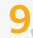

645 427 742 462 41:0.104 297:0.058 368:0.051 34:0.045 223:0.044


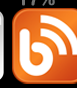

671 600 891 652 113:0.102 333:0.062 299:0.057 194:0.040 183:0.033


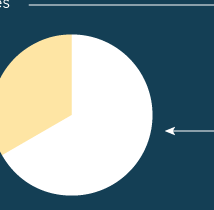

284 35 316 77 352:0.082 168:0.045 40:0.026 269:0.026 209:0.025


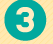

549 22 629 64 358:0.063 87:0.047 109:0.038 309:0.032 245:0.030


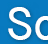

469 720 534 789 232:0.031 189:0.030 94:0.028 337:0.026 348:0.024


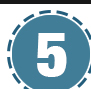

209 39 257 99 184:0.038 152:0.027 269:0.026 70:0.025 254:0.016


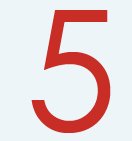

493 781 607 829 278:0.093 232:0.071 201:0.067 255:0.053 108:0.031


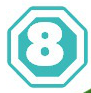

527 748 757 811 383:0.120 157:0.045 362:0.043 337:0.031 126:0.018


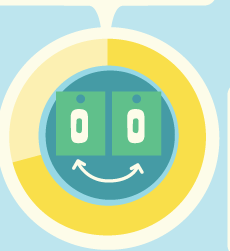

571 100 701 131 371:0.037 32:0.033 45:0.024 368:0.020 345:0.019


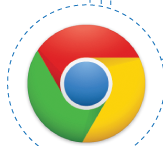

In [133]:
print_cluster(3, 10)

In [143]:
for i in range(305, len(cluster_map)): 
    if i % 10 == 0: 
        print(i)
    if i in cluster_map: 
        print_cluster(i, 10, should_display=False)

310


/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:764: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
image file is truncated (0 bytes not processed)
970
980
990


In [144]:
json.dump(cluster_map, open("cluster_map.json", "w"))